In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

In [2]:
df = pd.read_csv('secom.data', sep=" ", header=None)

In [3]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045


In [5]:
df.shape

(1567, 590)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [9]:
df.isnull().sum()

0        6
1        7
2       14
3       14
4       14
5       14
6       14
7        9
8        2
9        2
10       2
11       2
12       2
13       3
14       3
15       3
16       3
17       3
18       3
19      10
20       0
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
      ... 
560      1
561      1
562    273
563    273
564    273
565    273
566    273
567    273
568    273
569    273
570      0
571      0
572      0
573      0
574      0
575      0
576      0
577      0
578    949
579    949
580    949
581    949
582      1
583      1
584      1
585      1
586      1
587      1
588      1
589      1
Length: 590, dtype: int64

<h4>observations:</h4>
<p>
<h4>1.We can see that there are null values inbetween due to the non alignment of rows and columns</h4>
<p>
 <h4>IMPUTATION</h4>   
Now we will replace the null values with mean
</h4>

In [65]:
data=df.fillna(df.mean())

In [54]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,0.001956,54.936224,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,0.005396,91.549650,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,0.005396,97.934373,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,0.005396,97.934373,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


<h4>Principal Component Analysis</h4>
<p>
<h4>1.Standerdization</h4>

In [14]:

stdn_df=StandardScaler().fit_transform(data)
stdn_df.shape

(1567, 590)

<h4>2.Covarience Matrix</h4>

In [15]:
cov_mat = np.matmul(stdn_df.T,stdn_df)

In [18]:
cov_mat.shape

(590, 590)

<h4>3.Finding Eigen Values and Eigen Vectors:</h4>

In [46]:
e_val,e_vec = eigh(cov_mat)

In [21]:
e_val.shape

(590,)

In [22]:
e_vec.shape

(590, 590)

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


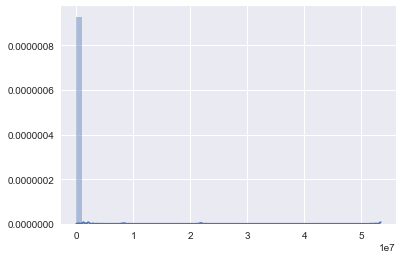

In [35]:
sns.distplot(e_val)

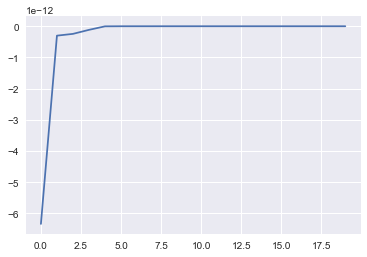

In [37]:
plt.plot(e_val[:20])

<h4>We can observe that the eigen values tend to go beyond 17.5</h4>

<h4>Plotting variances</h4>

In [48]:
sum_val=sum(e_val)
e_var=[]
e_val.sort()
for i in e_val:
    e_var.append(i/sum_val)
    

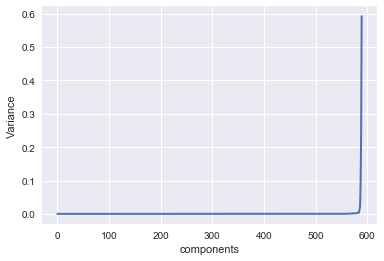

In [50]:

plt.clf()
plt.plot(e_var, linewidth=2)
plt.xlabel('components')
plt.ylabel('Variance')
plt.show()

<h4>For a cross check lets do the other way around</h4>

In [66]:
data = data.values
m_data = np.mean(data.T, axis=1)
d_data = data - m_data
idx = np.argsort(e_val)[::-1]
P = e_vec.T.dot(d_data.T)
var = np.array([np.var(P[x,:]) for x in range(P.shape[0])])

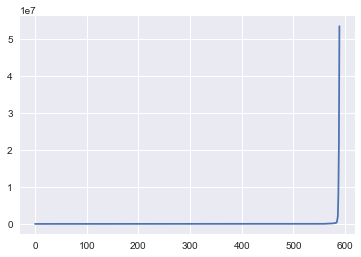

In [67]:
plt.plot(var)

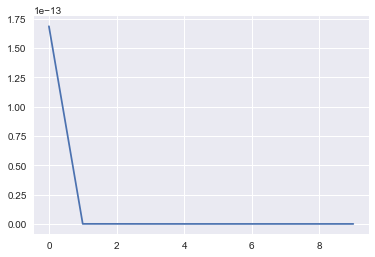

In [68]:
plt.plot(var[:10])

<h4>We can see that 60% variance is achieved through around 600 components and with threshold around 1</h4>